# Insurance Claim Fraud Detection

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

#to view figures locally
import plotly.offline as py  
import plotly.graph_objs as go
from plotly.figure_factory import create_table


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#To check model accuracy, errors and validations
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Automobile_insurance_fraud.csv")

In [3]:
df.head(7)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN


In [4]:
df.tail(7)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,NaN
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,YES,6480,540,1080,4860,Honda,Civic,1996,N,NaN
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


Exploratory Data Analysis (EDA)

In [5]:
# Checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
#Checking for missing values

missing_values = df.isnull().sum()

missing_values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

From the above, we can see that there are no missing value in all columns, except for _c39 which doesn't have any input. we will be droping the _c39 column

In [8]:
# Drop the '_c39' column as we won't be needing it for this analysis and it also does not contain any input

insurance_df = df.drop(columns=['_c39'])

In [9]:
# We will also check for any columns with a single unique value, as these won't be useful for modeling

unique_values = insurance_df.nunique()

unique_values

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [10]:
# Identify categorical columns
categorical_cols = insurance_df.select_dtypes(include=['object']).columns

# Display categorical columns
categorical_cols.tolist()

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [11]:
# Statistical summary of numerical features

insurance_df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In some column, There is a large difference between the 75% and max which indicates the presence of outliers.

In [12]:
# Checking the Distribution of the target variable

target_distribution = insurance_df['fraud_reported'].value_counts()

target_distribution

N    753
Y    247
Name: fraud_reported, dtype: int64

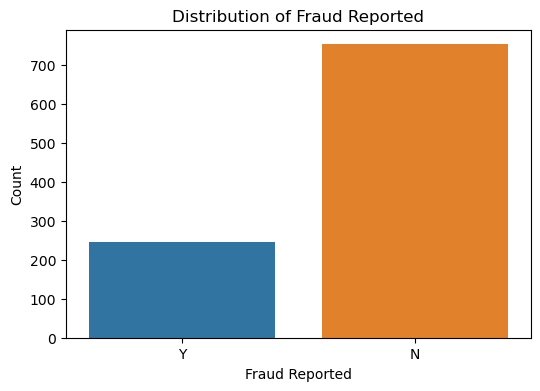

In [13]:
# Visualizing the distribution of the target variable

plt.figure(figsize=(6,4))
sns.countplot(x='fraud_reported', data=insurance_df)
plt.title('Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

The target variable fraud_reported is imbalanced, with 753 instances of 'N' (not fraudulent) and 247 instances of 'Y' (fraudulent).

In [14]:
# Checking the correlation

df1_corr = insurance_df.corr()

df1_corr

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


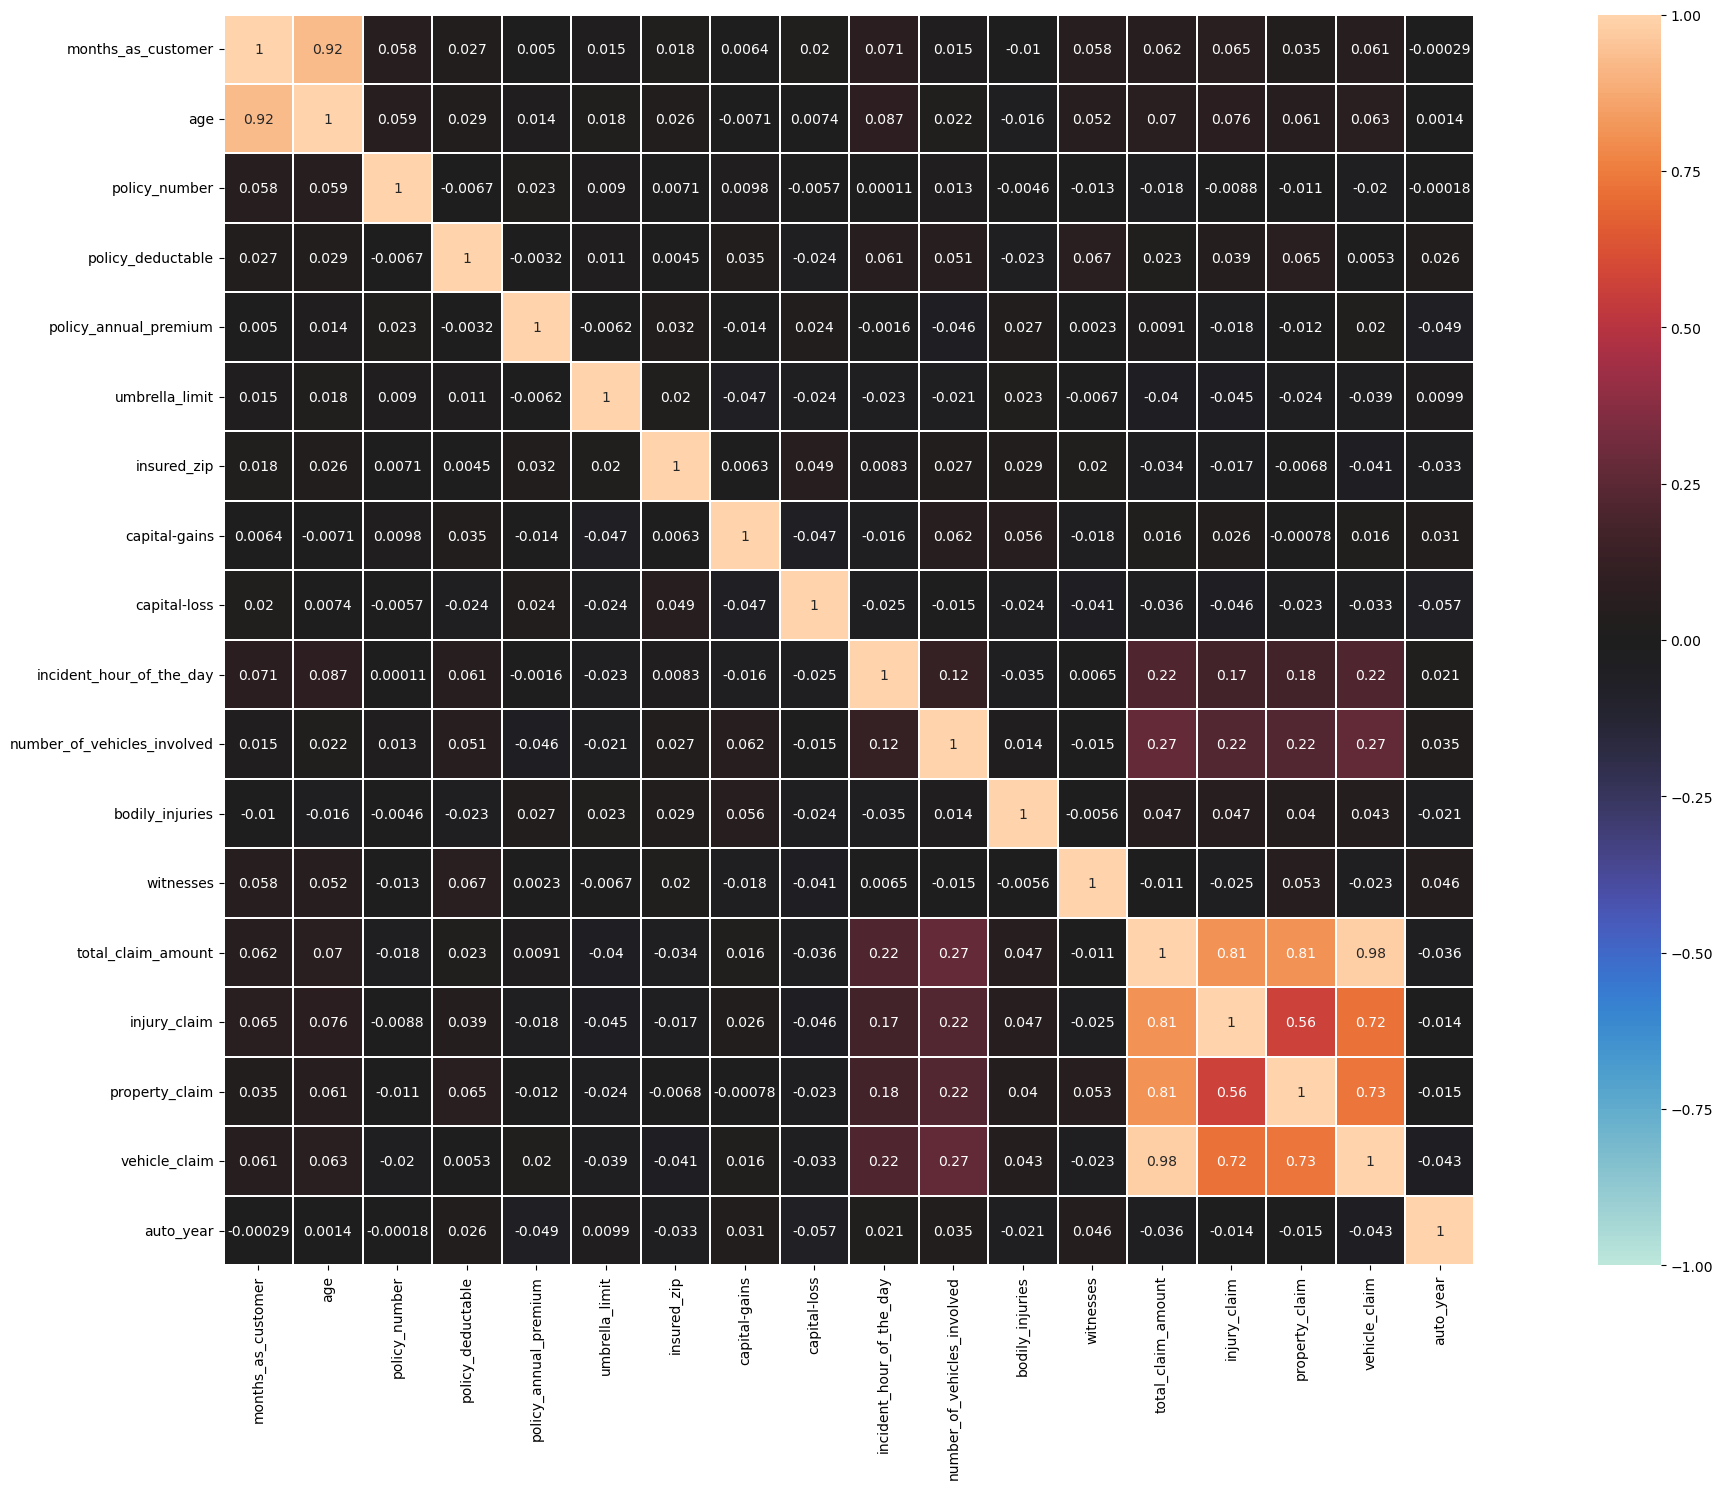

In [15]:
# Plotting the correlation

plt.figure(figsize = (25,15))
sns.heatmap(df1_corr, vmin = -1, vmax = 1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = 0.1)
plt.tight_layout()

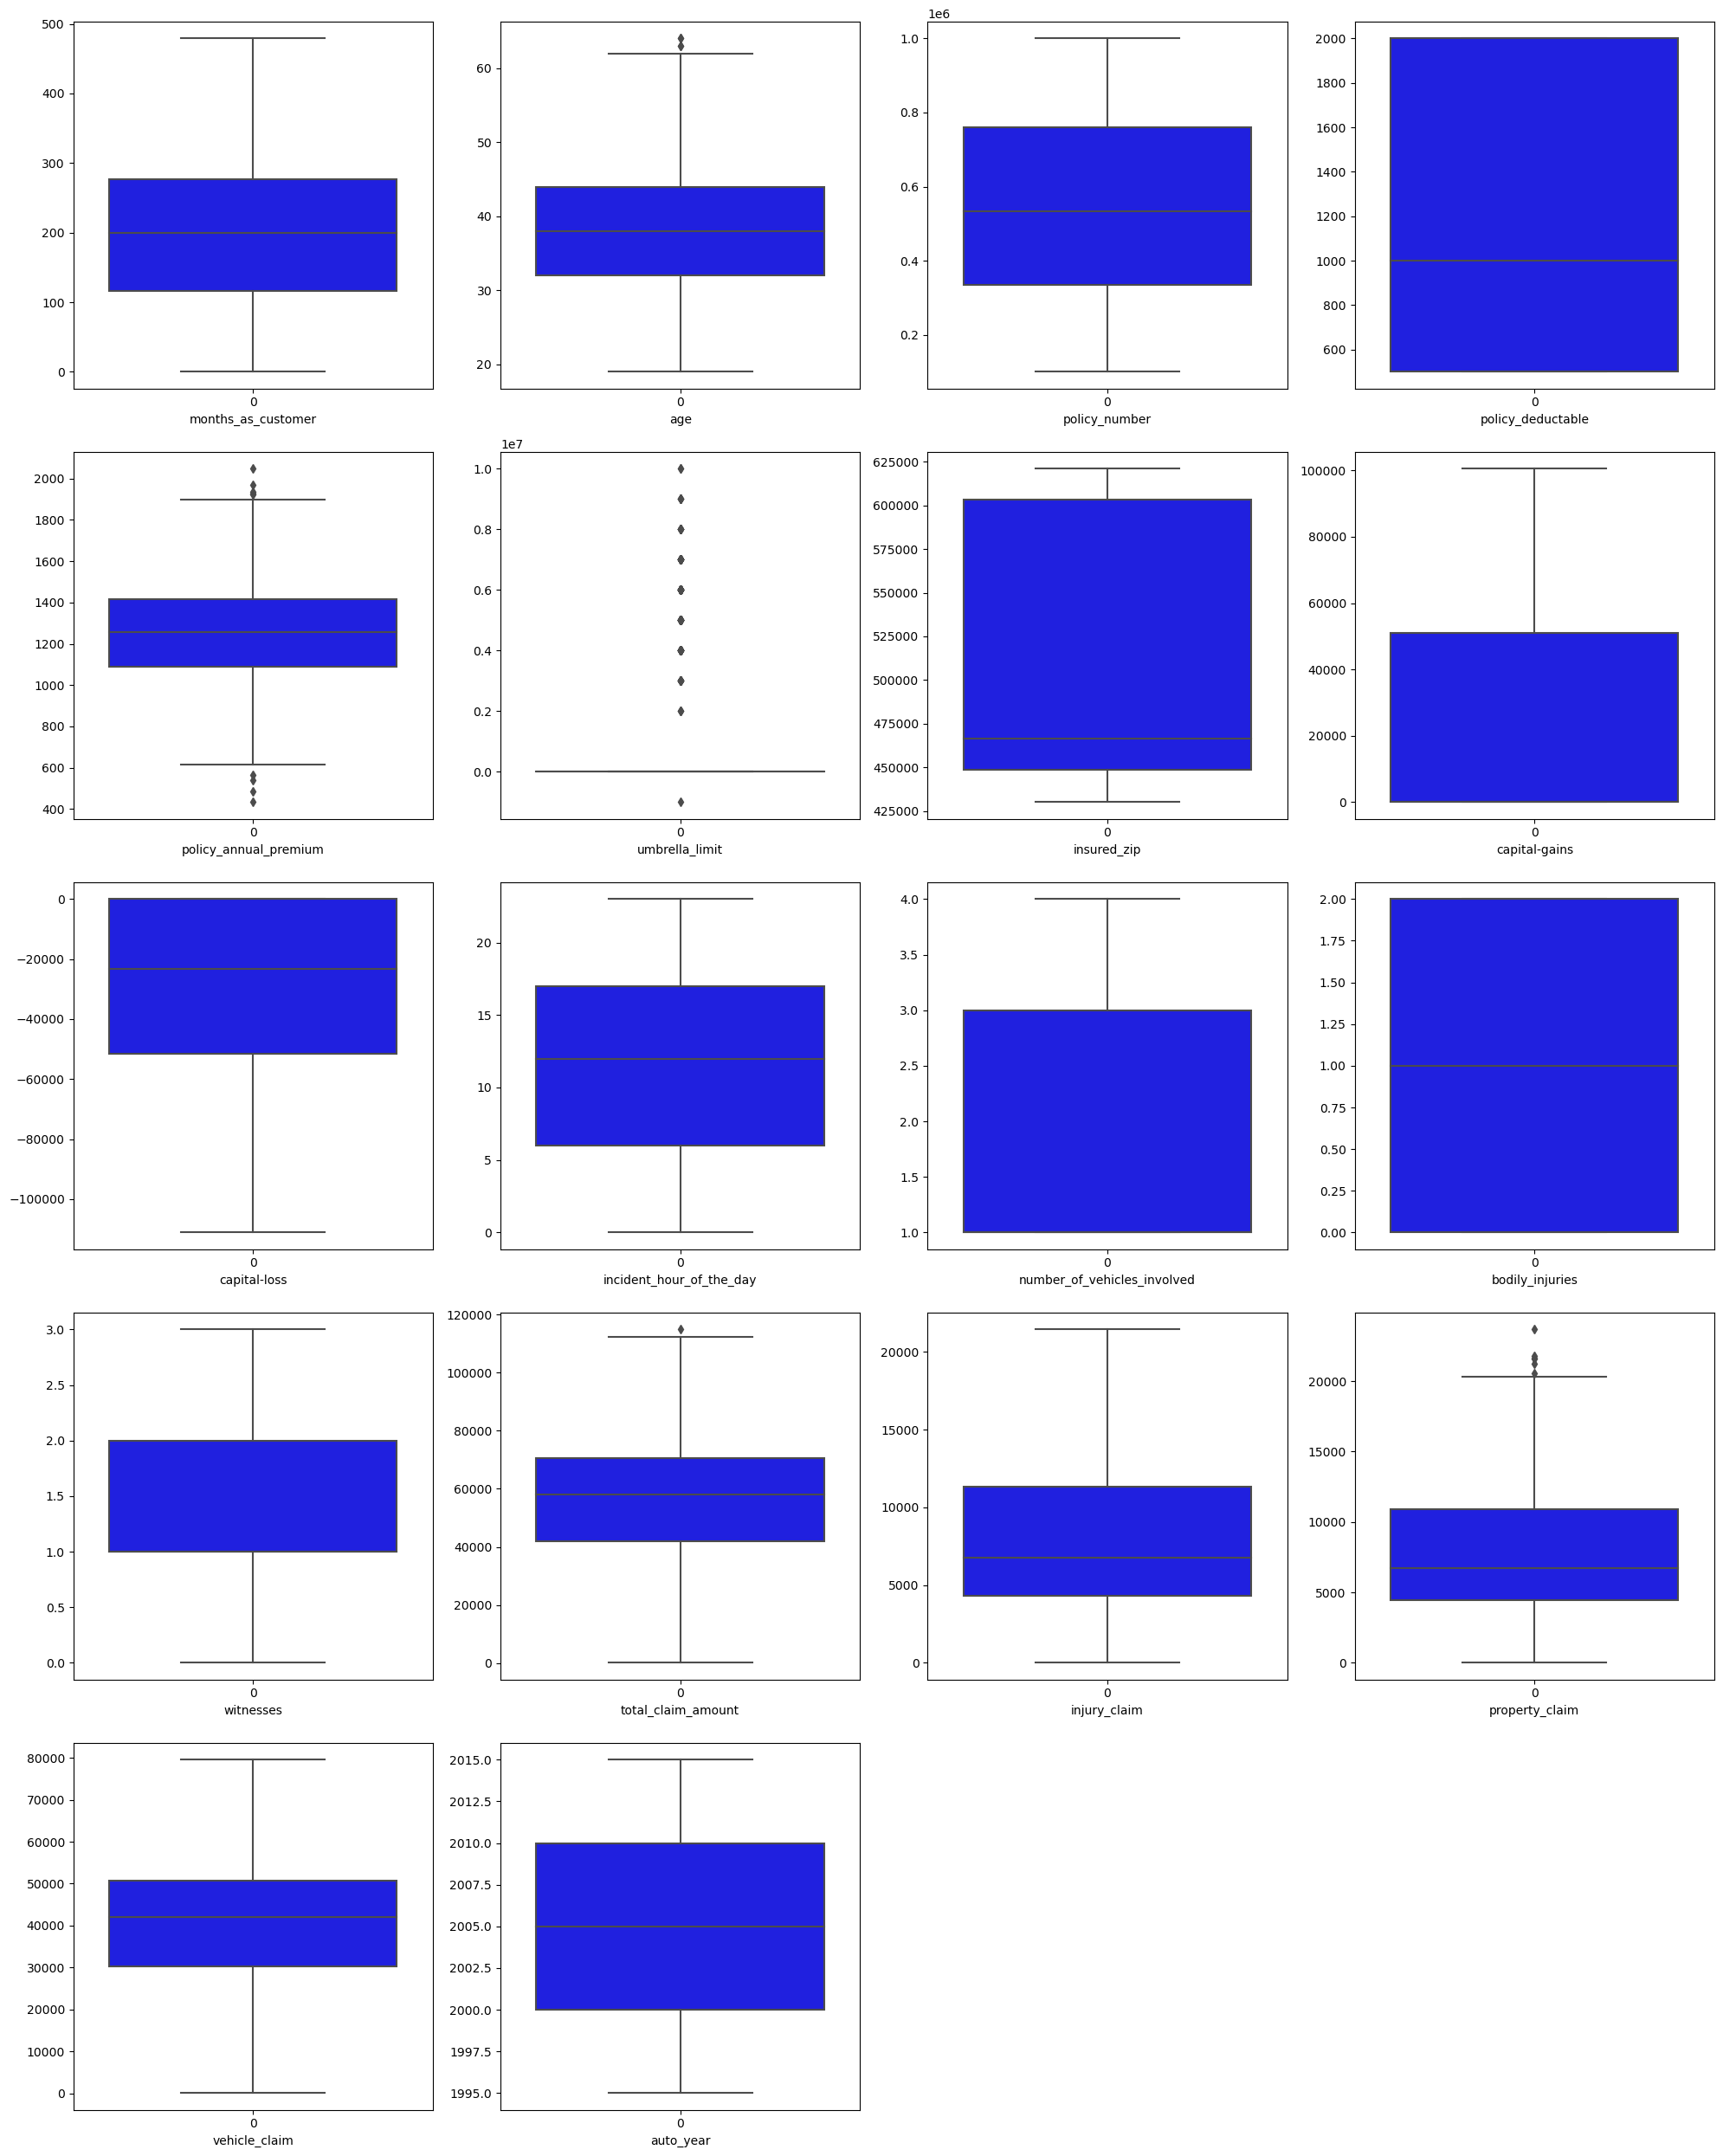

In [16]:
# To check outliers


# Select only numerical columns 
numerical_columns = insurance_df.select_dtypes(exclude=['object']).columns.tolist()

plt.figure(figsize=(20, 25))
G = 1
for i in numerical_columns:
    if G <= 23:  # Plotting for the first 10 numerical columns
        plt.subplot(5, 4, G)
        sns.boxplot(insurance_df[i], color="blue")
        plt.xlabel(i)
    G += 1

plt.tight_layout()
plt.show()


from the above, we found outlier in some columns.

so, removing the outliers using zscore

In [17]:
# removing the outliers using zscore techniques 

from scipy.stats import zscore

out_features=insurance_df[['policy_annual_premium', 'umbrella_limit', 'property_claim', 'total_claim_amount']]
z=np.abs(zscore(out_features))

In [18]:
# using 3 as the threshold. any value more than 3 is considered as an outlier. from the standard deviation

np.where(z>3)

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
        657, 700, 763, 875, 922, 975], dtype=int64),
 array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1],
       dtype=int64))

In [19]:
# keeping all the columns where the z value is less than 3

df2 = insurance_df[(z<3).all(axis=1)]

df2.shape

(981, 39)

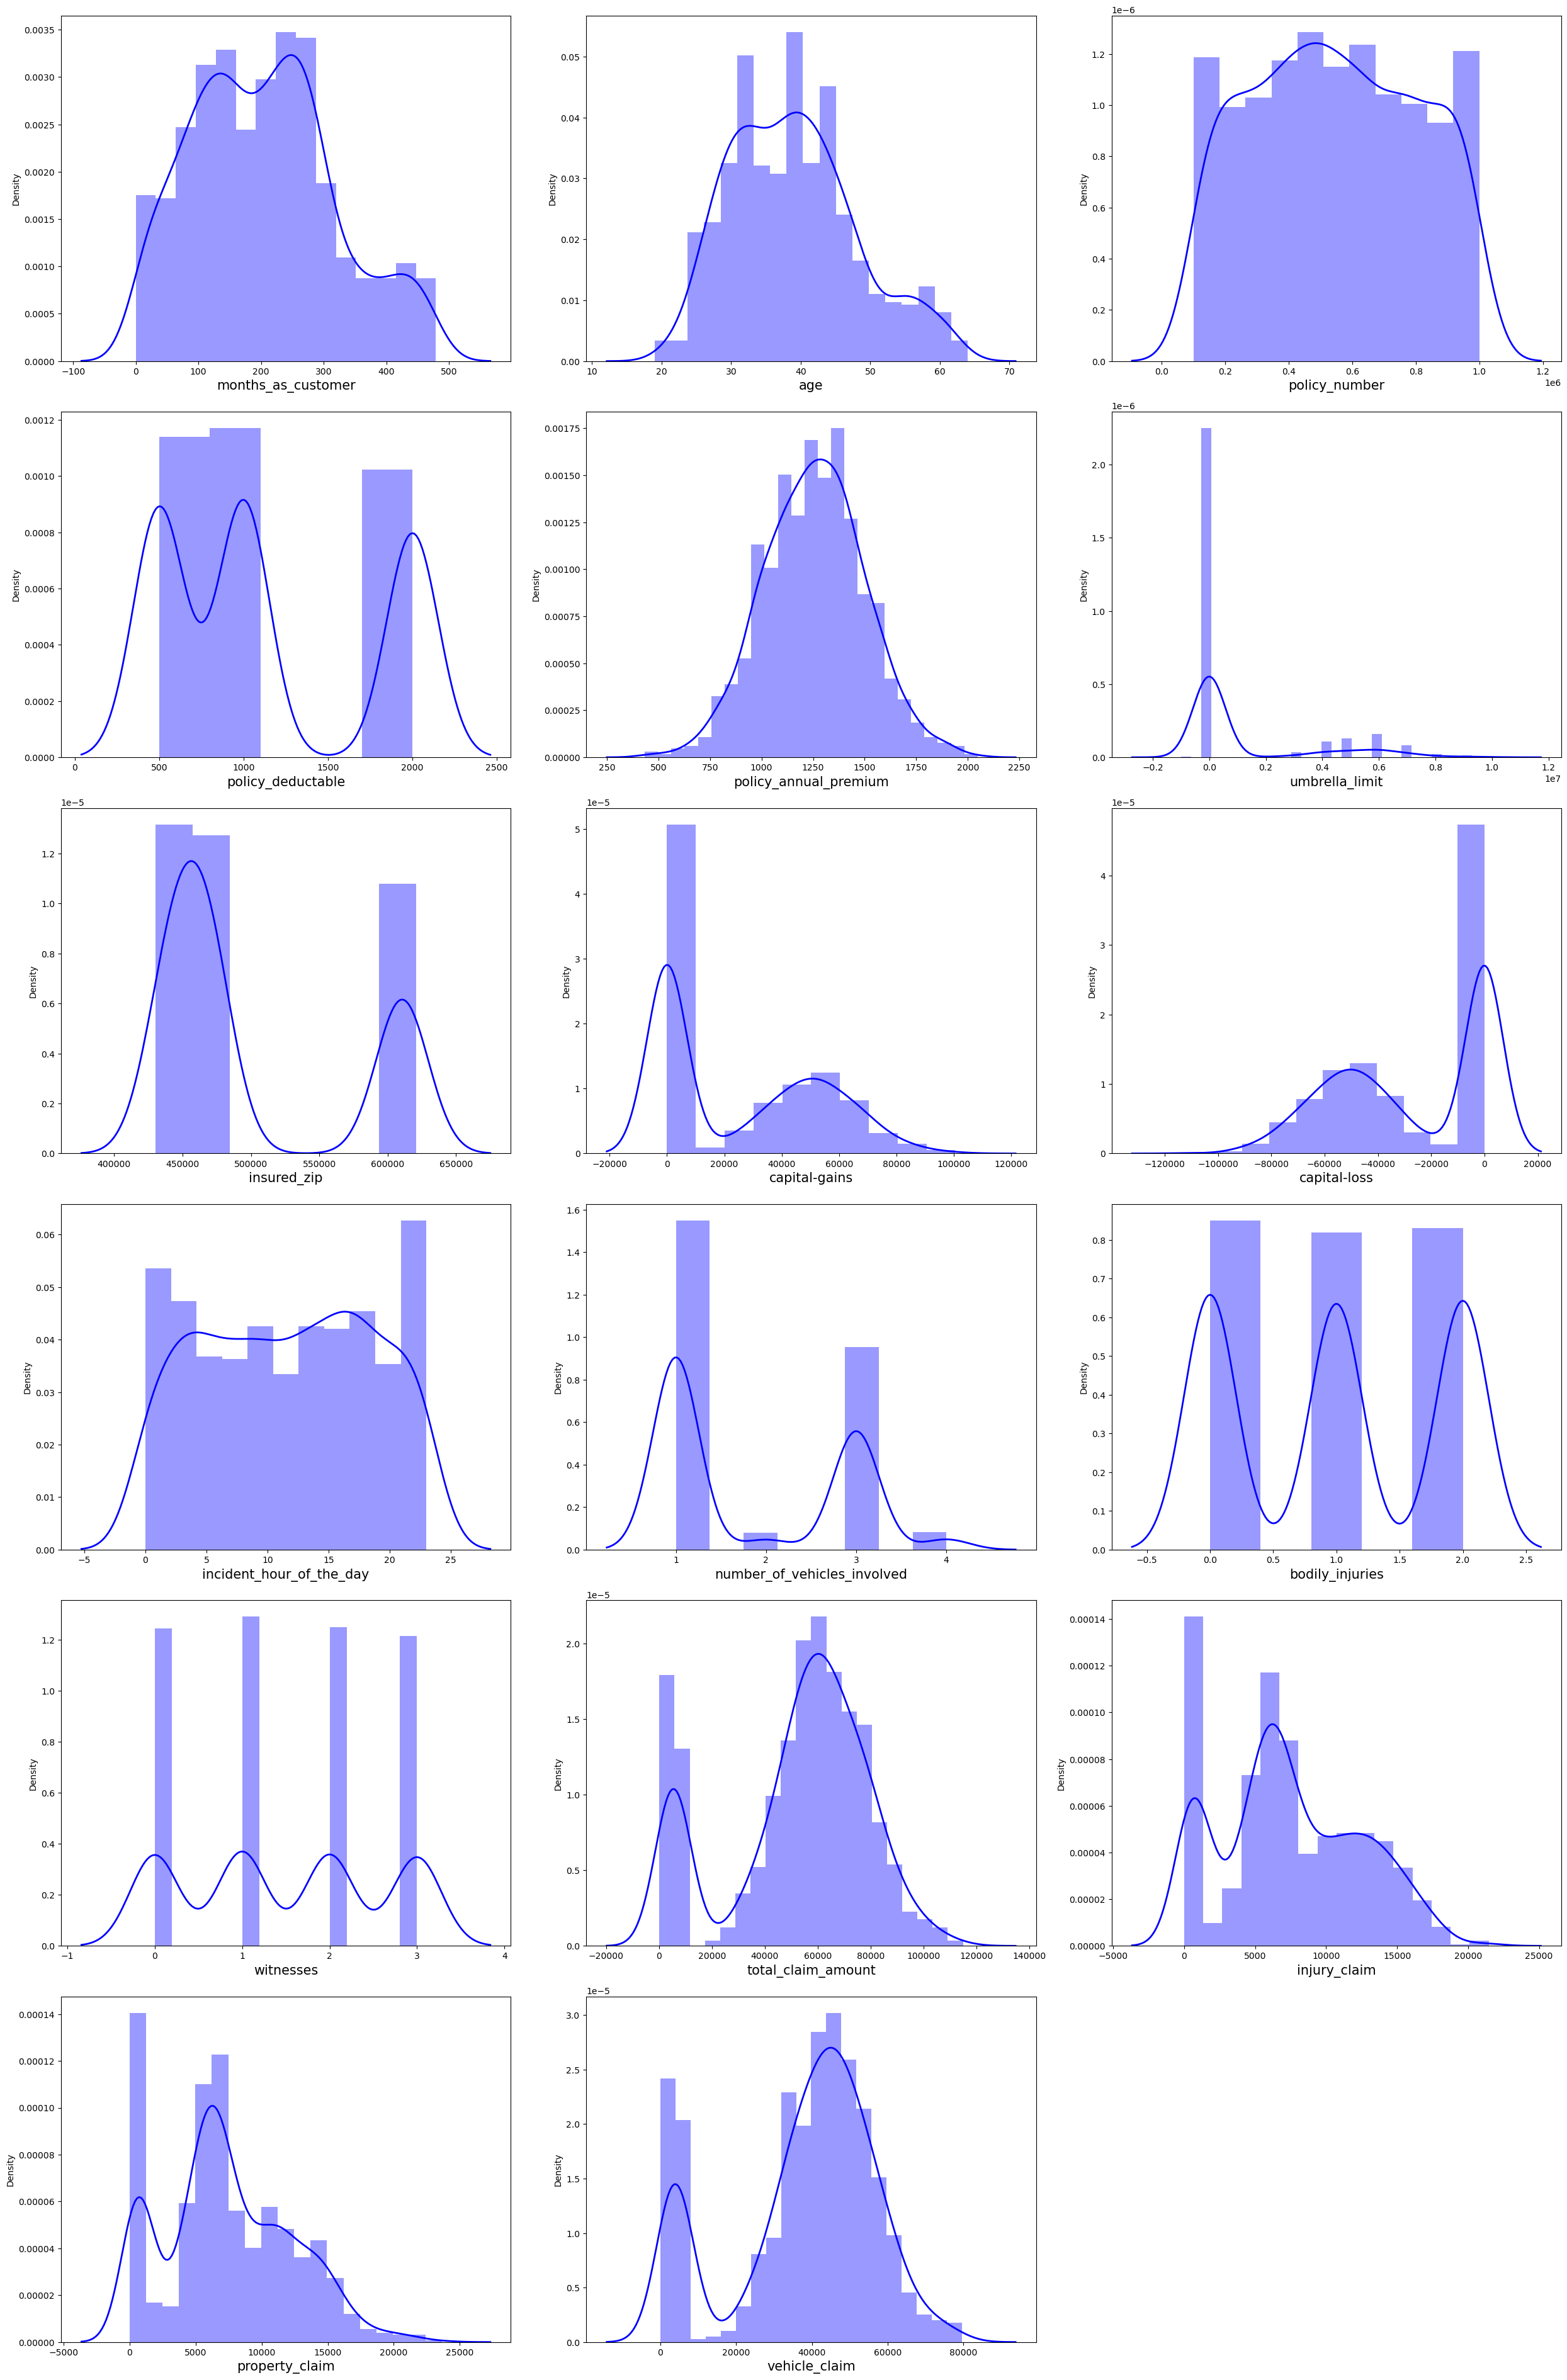

In [20]:
# Check for Skewness
# Filter only numeric columns
numeric_features = df2.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(25, 50))
position = 1

for feature in numeric_features:
    if position <= 17:
        ax = plt.subplot(8, 3, position)
        sns.distplot(df[feature], color='b', kde_kws={"lw": 2})
        plt.xlabel(feature, fontsize=15)
        position += 1

plt.tight_layout()
plt.show()


In [21]:
# checking skewness further

df2.skew()

months_as_customer             0.363268
age                            0.475942
policy_number                  0.038201
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
insured_zip                    0.838685
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
bodily_injuries                0.001877
witnesses                      0.024567
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
auto_year                     -0.054033
dtype: float64

From the above we can see thatit is only umbrella_limit column that is skewed

In [22]:
# Removing skewness in volume column using cuberoot method

df2['umbrella_limit'] = np.cbrt(df2['umbrella_limit'])


In [23]:
# Convert dates to datetime format

df2['policy_bind_date'] = pd.to_datetime(df2['policy_bind_date'], errors='coerce')
df2['incident_date'] = pd.to_datetime(df2['incident_date'], errors='coerce')


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df2.columns:
    if df2[col].dtypes == 'object':
        df2[col] = le.fit_transform(df2[col])
        

In [25]:
df2.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0.000000,466132,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,1,2000,1197.22,170.997595,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-06-09,2,0,2000,1413.14,170.997595,430632,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,1,2000,1415.74,181.712059,608117,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,2,1000,1583.91,181.712059,610706,...,1,1,6500,1300,650,4550,0,31,2009,0


In [26]:
# Splitting the data into features and target
X = df2.drop('fraud_reported', axis=1)
y = df2['fraud_reported']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, 
                                                    stratify=y)

# Feature scaling

# Identify numeric columns in X_train
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric columns of X_train
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])

X_test_scaled = scaler.transform(X_test[numeric_cols])

# Checking the shape of the training and testing sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((784, 18), (197, 18), (784,), (197,))

In [27]:
classifiers = {
    "LogisticRegression": LogisticRegression(solver='lbfgs', max_iter=1000),
    "LGBMClassifier": LGBMClassifier(),
    "XGBClassifier": XGBClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(3),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "GaussianNB": GaussianNB(),
}

classifier_metrics = {}  

# Training and evaluating each model
for model_name, model in classifiers.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    
   
    # Making predictions on the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary') 
    recall = recall_score(y_test, y_pred, average='binary')       
    f1 = f1_score(y_test, y_pred, average='binary')                
    
    # Storing the metrics in the dictionary
    classifier_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Converting the dictionary to a DataFrame for easier comparison
model_comparison = pd.DataFrame(classifier_metrics).T

model_comparison


[LightGBM] [Info] Number of positive: 192, number of negative: 592
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244898 -> initscore=-1.126011
[LightGBM] [Info] Start training from score -1.126011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.761421,1.000000,0.020833,0.040816
LGBMClassifier,0.736041,0.400000,0.166667,0.235294
XGBClassifier,0.720812,0.333333,0.145833,0.202899
KNeighborsClassifier,0.715736,0.277778,0.104167,0.151515
DecisionTreeClassifier,0.654822,0.261905,0.229167,0.244444
RandomForestClassifier,0.756345,0.500000,0.041667,0.076923
AdaBoostClassifier,0.741117,0.400000,0.125000,0.190476
GradientBoostingClassifier,0.756345,0.500000,0.145833,0.225806
GaussianNB,0.639594,0.255319,0.250000,0.252632


From the above we can observe that Linear regression is our best performing model

In [28]:
# Let's carry out cross validation on our best performing model.
# This ensures the model is not overfitting and will perform well for unseen data.

# Splitting the data into features and target
X = df2.drop(['fraud_reported', 'policy_bind_date', 'incident_date'], axis=1)
y = df2['fraud_reported']

# Looping through different values of cv
for c in range(2, 5):
    # Create an instance of GradientBoostingClassifier
    model = LogisticRegression()

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=c)

    # Print the mean of the cross-validation scores
    print(f"CV={c}, Score={cv_scores.mean()}")


CV=2, Score=0.756369757679039
CV=3, Score=0.7543323139653415
CV=4, Score=0.7543305126928821


In [29]:
# Hypertuning our Logistic Regression model
model = LogisticRegression()

# Let's Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'max_iter': [100, 200, 300]  
}

grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation

res = grid_search.fit(X_train_scaled, y_train)


In [30]:
best_model = res.best_params_

In [31]:
best_model

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [32]:
# Saving our model

import joblib

In [33]:
joblib.dump(best_model, 'census_income.obj')

['census_income.obj']